---

<p style="font-name: monospace; line-height: 2; font-size: 30px; font-weight: bold; letter-spacing: 2px; text-align: center;">Taxi Ride Duration Prediction- A Regression Analysis - Risith Roy</p>

---

# **Regression with Neural Networks in TensorFlow**

**Regression Analysis** is a set of statistical processes for estimating the relationships between a **dependent variable (often called 'outcome variable') or y / Label** and one or more **independent variable (often called 'predictors', 'covariates', or 'features') or X / our input Features cols.**

### **Architecture of a Regreesion Model:**

- **Input layer shape:** Same shape as the number of features.
- **Hidden layer(s):** Customizable, with a minimum of 1 hidden layer and no maximum limit.
- **Neurons per hidden layer:** Typically 10 to 100 neurons per hidden layer.
- **Output layer shape:** Matches the desired prediction shape.
- **Hidden activation:** Often utilizes `ReLU` (Rectified Linear Unit) activation function.
- **Output activation:** Can be `None` for regression, `ReLU` for positive values, or `logistic/tanh` for binary classification.
- **Loss function:** Typically `MSE` (Mean Square Error) or `MAE` (Mean Absolute Error) for regression, or `Huber` for handling outliers.
- **Optimizer:** Choices include `SGD` (Stochastic Gradient Descent) or `Adam`, used for updating neural network weights during training.


---

# **Description:**

The dataset utilized in this context is derived from the 2016 NYC Yellow Cab trip record data, which is accessible through Google Cloud Platform's Big Query service. This data was initially released by the NYC Taxi and Limousine Commission (TLC). For the specific requirements of this code , the dataset was subjected to sampling and cleaning. Participants are tasked with predicting the duration of individual trips in the test set based on various trip attributes.

The datset contains the following fields:

#### **Independent Variables**

* `id` - a unique identifier for each trip.
* `vendorid` - a code indicating the provider associated with the trip record. 
* `pickupdatetime` - date and time when the meter was engaged.
* `dropoffdatetime` - date and time when the meter was disengaged.
* `passengercount` - the number of passengers in the vehicle (driver entered value).
* `pickuplongitude` - the longitude where the meter was engaged .
* `pickuplatitude` - the latitude where the meter was engaged.
* `dropofflongitude` - the longitude where the meter was disengaged .
* `dropofflatitude` - the latitude where the meter was disengaged.
* `store_and_fwd_flag` — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.

#### **Dependent Variables**

* `trip_duration` — duration of the trip in seconds.
 

---

---

---

# **Import Libraries**

Import the dependencies libraies that we need for this research...

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2
%matplotlib inline

def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
set_seed()

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.style.use('fivethirtyeight')
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 25)
pd.set_option("display.max_rows", 20)

print("setup-complete!")

setup-complete!


# **Read-in Data**

In [2]:
raw = "../input/nyc-taxi-trip-duration/NYC.csv"
taxi_data = pd.read_csv(raw, low_memory=False)

# **Check Data**

Let's see the data and how it looks.

In [3]:
taxi_data # check all data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


> Wow, this data has $1,458,644$ (rows) and $11$ (columns), in my opinion, this data is very good data to be used as a project because this data has a lot of rows, haha, but, if you apply this data to predicting taxi trip duration for the year ($2021$ - $2022$) in my opinion, this will not work, because you know for yourself that the development of taxis for ($2016$ - $2021$) is very large, not to mention that many large shuttle companies are replacing public taxis, such as Uber.

In [4]:
taxi_data.info(verbose=True) # getting the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


> ok, there are $4$ data of type object, $3$ data of type **int64**, and the rest of data type **float64**, I don't know if there is any null value in this data, let's check, but... before that let's check the Categorical and Numceric uniqueness...

### **Uniqueness Categorical Variables**
Let's have a look at categorical variables. How many unique values of these variables.

In [5]:
categorical = taxi_data.select_dtypes(exclude=[np.number]).columns
for cat_col in categorical:
    print(f"{cat_col} : {taxi_data[cat_col].nunique()} uniqueness vaiables(s)")

id : 1458644 uniqueness vaiables(s)
pickup_datetime : 1380222 uniqueness vaiables(s)
dropoff_datetime : 1380377 uniqueness vaiables(s)
store_and_fwd_flag : 2 uniqueness vaiables(s)


> Great! let's check the Discrete and Continuous Variables...

### **Discrete and Continuous Variables**
Let's have a look at Discrete and Continuous variables.

In [6]:
numeric = taxi_data.select_dtypes(include=[np.number]).columns
for num_col in numeric:
    print(f"{num_col} : {taxi_data[num_col].nunique()} uniqueness variable(s)")

vendor_id : 2 uniqueness variable(s)
passenger_count : 10 uniqueness variable(s)
pickup_longitude : 23047 uniqueness variable(s)
pickup_latitude : 45245 uniqueness variable(s)
dropoff_longitude : 33821 uniqueness variable(s)
dropoff_latitude : 62519 uniqueness variable(s)
trip_duration : 7417 uniqueness variable(s)


> Okay! let's check if there any missing value...

### **How many missing data points do we have?**

Let's see how many missing data we have in each column....

In [7]:
# Get the number of missing data points per column
missing_values_count = taxi_data.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

> Stranger in the nigghhtt..... God, I love that song, owh, look at that, looks like the data is not have any missing values! okay, let's go to the next steps! 

### **Let's do a simple analysis...**

berfore that let's recap the data...

### **Recap Data:**

* Data has  1,458,644  (rows) and  11  (columns), in my opinion, this data is very good data to be used as a project because this data has a lot of rows, haha, but, if you apply this data to predicting taxi trip duration for the year ( 2021  -  2022 ) in my opinion, this will not work, because you know for yourself that the development of taxis for ( 2016  -  2021 ) is very large, not to mention that many large shuttle companies are replacing public taxis, such as Uber.
* There are $4$ data of type object, $3$ data of type **int64**, and the rest of data type **float64**.
* **Uniqueness Categorical Variables:**
    * `id` : $1458644$ uniqueness vaiables(s)
    * `pickup_datetime` : $1380222$ uniqueness vaiables(s)
    * `dropoff_datetime` : $1380377$ uniqueness vaiables(s)
    * `store_and_fwd_flag` : $2$ uniqueness vaiables(s)
* **Discrete and Continuous Variables:**
    * `vendor_id` : $2$ uniqueness variable(s)
    * `passenger_count` : $10$ uniqueness variable(s)
    * `pickup_longitude` : $23047$ uniqueness variable(s)
    * `pickup_latitude` : $45245$ uniqueness variable(s)
    * `dropoff_longitude` : $33821$ uniqueness variable(s)
    * `dropoff_latitude` : $62519$ uniqueness variable(s)
    * `trip_duration` : $7417$ uniqueness variable(s)
* **Data is not have any missing values.**

# **Data Analysis**

Data Analysis is the process of systematically applying statistical and/or logical techniques to describe and illustrate, condense and recap, and evaluate data. Indeed, researchers generally analyze for patterns in observations through the entire data collection phase *(Savenye, Robinson, $2004$)*.
analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

Or, the easier, you can say in Data Analysis we (Data Scientist or Data Analyst) what ever you want to call that, in this section, we're looking for the correlation and also the relationships between every data (features and labels) or the variables using and applying the statistical and visualization methods for looking some patterns.

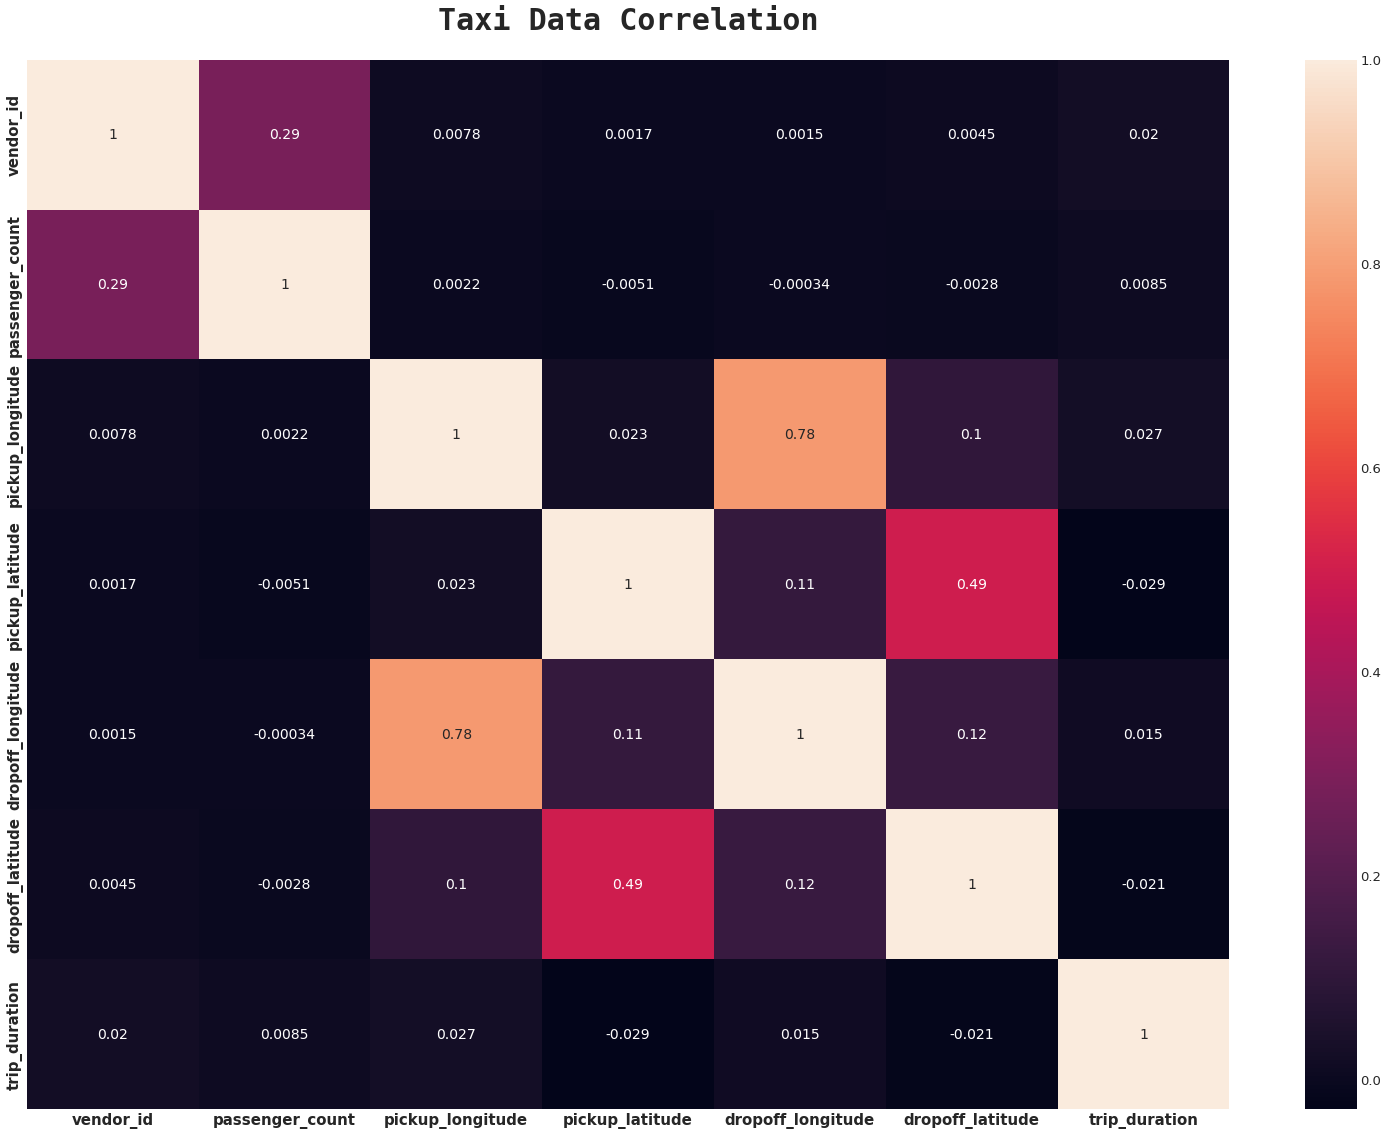

In [8]:
# let's make a correlation matrix for `cop_data`
sns.set_style("whitegrid") # set the seaborn style
plt.figure(figsize=(24, 18)) # figure the size
sns.heatmap(taxi_data.corr(), annot=True) # create a heatmap
plt.title("Taxi Data Correlation", weight="bold", fontsize=30, fontname="monospace", pad=30) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks

In [9]:
# Let's see the correlation clearly
(taxi_data.corr()["trip_duration"] # transform it into data corr
      .sort_values(ascending=False) # sort the values
      .to_frame() # change it into data frame
      .T) # transpose

,trip_duration,pickup_longitude,vendor_id,dropoff_longitude,passenger_count,dropoff_latitude,pickup_latitude
trip_duration,1.0,0.026542,0.020304,0.014678,0.008471,-0.020677,-0.029204


> Okay, if we look at the visualization and printing results above, we can see, `trip duration` has a pretty good correlation with `pickup_longtitude`, `vendor`, `dropoff_longtitude`, and also `passanger_count`. Okay... let's check the statistical summary... Note that this function can provide statistics for numerical features only.

In [10]:
taxi_data.describe(include=[np.number]).astype("int") # checking statistical summary

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644,1458644,1458644,1458644,1458644,1458644,1458644
mean,1,1,-73,40,-73,40,959
std,0,1,0,0,0,0,5237
min,1,0,-121,34,-121,32,1
25%,1,1,-73,40,-73,40,397
50%,2,1,-73,40,-73,40,662
75%,2,2,-73,40,-73,40,1075
max,2,9,-61,51,-61,43,3526282


#### **Some insights from the above summary:**

* Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.
* Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.
* The minimum trip duration is also quite low. We will come back to this later during Univariate Analysis.

## **Univariate Analysis**

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

In [11]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):
    
    """
    Showing visualization of univariate
    analysis with displot and qqplot
    visualization from seaborn and statsmodel
    library.
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If ``x`` and ``y`` are absent, this is
        interpreted as wide-form. Otherwise it is expected to be long-form. 
    title1: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
    title2: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
        
    Returns
    -------
    fig : matplotlib figure
        Returns the Figure object with the plot drawn onto it.
    """
    
    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )

    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )
    
    ax1.set_title( # set the title 1
        title1, 
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line 
    )
    
    ax2.set_title( # set the title 2
        title2, 
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    return fig # returning the figure

Let's try to find the proportion that lies in between two standard deviation ($\sigma$) from mean ($\mu$) using ***Chebychev's Theorem***, and let's try to interprete...

---

<p style="font-name: monospace; line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;">Chebychev's Theorem</p>
$$
\begin{aligned}
1 - \frac{1}{k^2}: k &= 2 -> 1 - \frac{1}{2^2} = \frac{3}{4} -> 75 \\
                   k &= 3 -> 1 - \frac{1}{3^2} = \frac{8}{9} -> 88.9
\end{aligned}
$$
<br>
<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">How to find Standard Deviation ($\sigma$)?</p>
<p style="font-name: monospace; line-height: 2; font-size: 13px; font-weight: bold; letter-spacing: 2px; text-align: center;">Here's the Formula:</p>
$$
\begin{aligned}
\sigma &= \sqrt{\sigma^2} = \sqrt{\frac{\sum{(x - \mu)^2}}{N}} \\
s &= \sqrt{s^2} = \sqrt{\frac{\sum{(x - \bar{x})^2}}{n - 1}}
\end{aligned}
$$
<br>
<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">How to find Mean ($\mu$)?</p>
<p style="font-name: monospace; line-height: 2; font-size: 13px; font-weight: bold; letter-spacing: 2px; text-align: center;">Here's the Formula:</p>
$$
\begin{aligned}
\mu = \frac{\sum{x}}{N} \\
\bar{x} = \frac{\sum{x}}{n}
\end{aligned}
$$

---

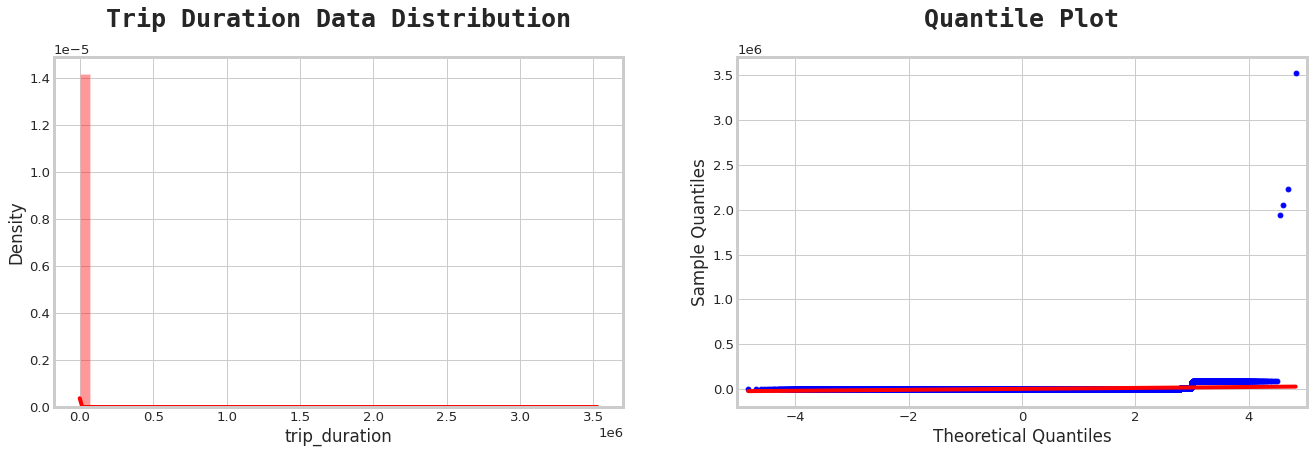

In [12]:
# Dependent Variables
univariate_analysis( # call the function
    data=taxi_data["trip_duration"], # put the data
    color="red", # pick the color
    title1="Trip Duration Data Distribution", # title1
    title2="Quantile Plot"); # title2

The histogram is really skewed as we can see. That's why we're using **Chebychev's Theorem**

---

## **Trip Duration**

Find the proportion that lies in between two standard deviation ($\sigma$) from mean ($\mu$), and let's try to interprete that. and In the Sales Data, the $\mu = 959$ and the $\sigma = 5237$, then without further ado let's calculate it.

#### **Calculation:**

* $959 - 2(5237) = -9515$
* $959 + 2(5237) = 11434$

#### ***Interpretation:***

at least $75$% time trip duration in NYC takes about $3.5$ hours of travel.

---

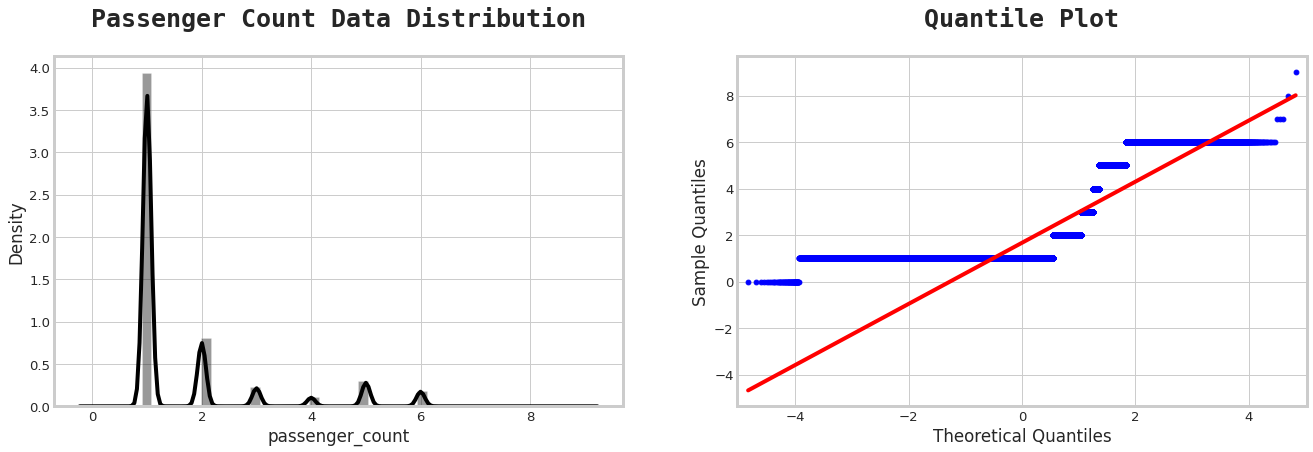

In [13]:
# Passenger Count Data
univariate_analysis( # call the function
    data=taxi_data["passenger_count"], # put the data
    color="black", # pick the color
    title1="Passenger Count Data Distribution", # title1
    title2="Quantile Plot"); # title2

---

## **Passenger Count**

Find the proportion that lies in between two standard deviation ($\sigma$) from mean ($\mu$), and let's try to interprete that. and In the Sales Data, the $\mu = 2$ and the $\sigma = 1$ if we round it, then without further ado let's calculate it.

#### **Calculation:**

* $2 - 2(1) = 0$
* $2 + 2(1) = 4$

#### ***Interpretation:***

At least approximately $75$% passenger count in NYC is around $0 - 4$ passengers count.

---

In [14]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = taxi_data.skew().sort_values(ascending=False).to_frame().head()
skew_value

,0
trip_duration,343.163944
pickup_latitude,5.489127
passenger_count,2.128094
vendor_id,-0.140144
dropoff_latitude,-20.671187


Okay, now let's move on to the Preprocessing Steps...

<a id="9"></a>
# **Data Preprocessing**

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [15]:
taxi_data[["p_ymd", "p_hms"]] = taxi_data["pickup_datetime"].str.split(" ", expand=True) # pickup datetime
taxi_data[["d_ymd", "d_hms"]] = taxi_data["dropoff_datetime"].str.split(" ", expand=True) # dropoff datetime

del taxi_data["pickup_datetime"] # del pickup
del taxi_data["dropoff_datetime"] # del dropoff

taxi_data[["p_year", "p_month", "p_day"]] = taxi_data["p_ymd"].str.split("-", expand=True).astype("int") # splitting pickup
taxi_data[["p_hour", "p_minute", "p_second"]] = taxi_data["p_hms"].str.split(":", expand=True).astype("int") # splitting pickup

del taxi_data["p_ymd"] # del pickup year month day
del taxi_data["p_hms"] # del pickup hour minute second

taxi_data[["d_year", "d_month", "d_day"]] = taxi_data["d_ymd"].str.split("-", expand=True).astype("int") # splitting dropoff
taxi_data[["d_hour", "d_minute", "d_second"]] = taxi_data["d_hms"].str.split(":", expand=True).astype("int") # splitting dropoff

del taxi_data["d_ymd"] # del dropoff year month day
del taxi_data["d_hms"] # del dropoff hour minute second
del taxi_data["id"] # del taxi id

taxi_data.head(2) # view

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,p_year,p_month,p_day,p_hour,p_minute,p_second,d_year,d_month,d_day,d_hour,d_minute,d_second
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,17,24,55,2016,3,14,17,32,30
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,0,43,35,2016,6,12,0,54,38


We can clearly see an outlier. there is an entry which is significantly different from others. As there is a single row only, let us drop this row. 

* There are some trips with even $0$ passenger count.
* There is only $1$ trip each for $7$ and $9$ passengers.

Let us remove the rows which have $0$ or $7$ or $9$ passenger count.

In [16]:
taxi_data.drop(taxi_data[taxi_data["trip_duration"] == 1939736].index, inplace = True)
taxi_data = taxi_data[taxi_data["passenger_count"]!=0]
taxi_data = taxi_data[taxi_data["passenger_count"]<=6]

okay, let's move on to the next steps...

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def preprocessing_data(data):
    """Returns Data that has been preprocessed"""
    # Prepare
    categorical_col = ["store_and_fwd_flag"]
    numerical_col = ['vendor_id', 'passenger_count', 'pickup_longitude', 
                     'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',  
                     'p_year', 'p_month', 'p_day', 'p_hour', 'p_minute', 'p_second', 
                     'd_year', 'd_month', 'd_day', 'd_hour', 'd_minute', 'd_second']
    
    # Create a columns transformer
    column_transformer = make_column_transformer(
        # Create a columns transformer between 0 and 1
        (MinMaxScaler(), numerical_col),
        # Encoder all values in this columns between 0 and 1
        (OneHotEncoder(handle_unknown="ignore"), categorical_col)
    )
    
    # Create X & y (features and label)
    X = data.drop(columns=["trip_duration"])
    y = data["trip_duration"]
    
    # Build our train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Fit the columns transformer to our training data
    column_transformer.fit(X_train)
    
    # Transform training and test data with normalization (MinMaxScaler) and encoder (OneHotEncoder, LabelEncoder)
    X_train_normal = column_transformer.transform(X_train)
    X_test_normal = column_transformer.transform(X_test)
    
    # X_train and X_test (features)
    X_train, X_test = tf.constant(X_train_normal, dtype=tf.float32), tf.constant(X_test_normal, dtype=tf.float32)
    
    # y_train and y_test (label)
    y_train, y_test = tf.constant(y_train, dtype=tf.float32), tf.constant(y_test, dtype=tf.float32)
    
    return X_train, X_test, y_train, y_test

# Call the function
X_train, X_test, y_train, y_test = preprocessing_data(taxi_data)

2021-12-31 20:01:19.402132: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:01:19.499574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:01:19.500252: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:01:19.502473: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [18]:
# Checking the shape and dimension of rows and columns (features)
X_train.shape, X_test.shape, X_train.ndim, X_test.ndim

(TensorShape([1166862, 20]), TensorShape([291716, 20]), 2, 2)

In [19]:
# Checking the shape and dimension of rows and columns (label)
y_train.shape, y_test.shape, y_train.ndim, y_test.ndim

(TensorShape([1166862]), TensorShape([291716]), 1, 1)

In [20]:
# Checking the type (features and label)
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(tf.float32, tf.float32, tf.float32, tf.float32)

In [21]:
# Checking the len (feature and label)
len(X_train), len(X_test), len(y_train), len(y_test)

(1166862, 291716, 1166862, 291716)





1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model.
2. **Compile our model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evalution metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns betwwen $X$ & $y$ (features and labels).



#### **To Check GPU Availability in Tensorflow**

In [22]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


#### **Listing Devices including GPU's with Tensorflow**

In [23]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

2021-12-31 20:01:23.550857: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14350345816476997590,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16152002560
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1277817022416646087
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

2021-12-31 20:01:23.551448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:01:23.551870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:01:23.552316: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:01:23.552680: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:01:23.552965: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 1

#### **To Check GPU in Tensorflow**

In [24]:
tf.test.is_gpu_available()

2021-12-31 20:01:23.884022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


True

2021-12-31 20:01:23.884592: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:01:23.884935: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:01:23.885371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:01:23.885709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-31 20:01:23.885985: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 1

Let's make a simple model... with multi perceptron...

<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">A Hidden Layer</p>
<br>
$$
\begin{aligned}
z_i = W_{o,i} + \sum_{j=1}^{m} x_j W_{i,j}  
\end{aligned}
$$
<br>
<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">Activation Functions</p>
<br>
$$
\begin{aligned}
g(z) =  max(0, z)
\end{aligned}
$$
<br>
<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">Output Layer</p>
<br>
$$
\begin{aligned}
\hat{y} = g(W_{o,i} + \sum_{j=1}^{d_1} g(z) W_{j,i})
\end{aligned}
$$
<br>
<p style="font-name: monospace; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center;">Mean Absolute Error Loss</p>
<br>
$$
\begin{aligned}
MAE = \frac{1}{n} \sum_{j=1}^{n} |y_j - \hat{y}_j| 
\end{aligned}
$$

In [25]:
# Set random seed
set_seed()

# Create the model
small_model = tf.keras.Sequential([
    layers.Dense(100, activation="relu", input_shape=[20], name="input_1"),
    layers.Dense(10, activation="relu", name="input_2"),
    layers.Dense(1, name="output_layer")
], name="small_model")

# Compile the model
small_model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
small_model_history = small_model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=10
)

2021-12-31 20:01:24.421081: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
36465/36465 [==============================] - 88s 2ms/step - loss: 386.3604 - mae: 386.3604 - val_loss: 206.0208 - val_mae: 206.0208
Epoch 2/10
36465/36465 [==============================] - 88s 2ms/step - loss: 188.4452 - mae: 188.4452 - val_loss: 179.5184 - val_mae: 179.5184
Epoch 3/10
36465/36465 [==============================] - 88s 2ms/step - loss: 174.6924 - mae: 174.6924 - val_loss: 172.9413 - val_mae: 172.9413
Epoch 4/10
36465/36465 [==============================] - 88s 2ms/step - loss: 169.7626 - mae: 169.7626 - val_loss: 168.2242 - val_mae: 168.2242
Epoch 5/10
36465/36465 [==============================] - 100s 3ms/step - loss: 167.0418 - mae: 167.0418 - val_loss: 165.1035 - val_mae: 165.1035
Epoch 6/10
36465/36465 [==============================] - 101s 3ms/step - loss: 165.2581 - mae: 165.2581 - val_loss: 161.7197 - val_mae: 161.7197
Epoch 7/10
36465/36465 [==============================] - 90s 2ms/step - loss: 163.9885 - mae: 163.9885 - val_loss: 161.8896 - v

Look at that! we're just making a simple model, and it works well! Let's see the layer and its architecture...

In [26]:
small_model.summary() # let's see its layer

Model: "small_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (Dense)              (None, 100)               2100      
_________________________________________________________________
input_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 3,121
Trainable params: 3,121
Non-trainable params: 0
_________________________________________________________________


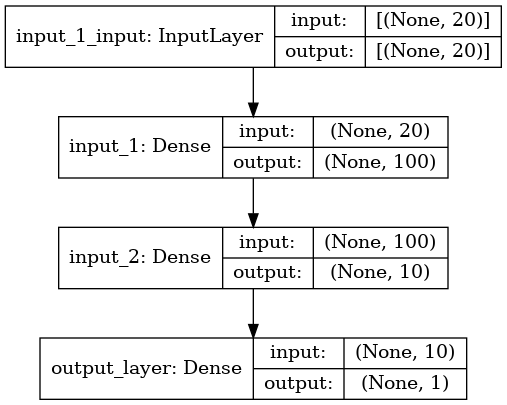

In [27]:
tf.keras.utils.plot_model(small_model, show_shapes=True) # let's see its architecture

Let's evaluate it!

In [28]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for
    training and validation metrics.
    """
    # Loss and Val_loss
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    # Mae and Val Mae
    mae = history.history["mae"]
    val_mae = history.history["val_mae"]
    
    # set the epochs
    epochs = range(len(history.history["loss"]))
    
    # Plot loss
    plt.figure(figsize=(20, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="Training_loss", marker="o", markerfacecolor="k")
    plt.plot(epochs, val_loss, label="Val_loss", marker="o", markerfacecolor="b")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, mae, label="Training_mae", marker="o", markerfacecolor="k")
    plt.plot(epochs, val_mae, label="Val_mae", marker="o", markerfacecolor="b")
    plt.title("MAE")
    plt.xlabel("Epochs")
    plt.legend();

In [29]:
small_model.evaluate(X_test, y_test) # evaluate it...

9117/9117 [==============================] - 14s 2ms/step - loss: 159.7864 - mae: 159.7864


[159.78636169433594, 159.78636169433594]

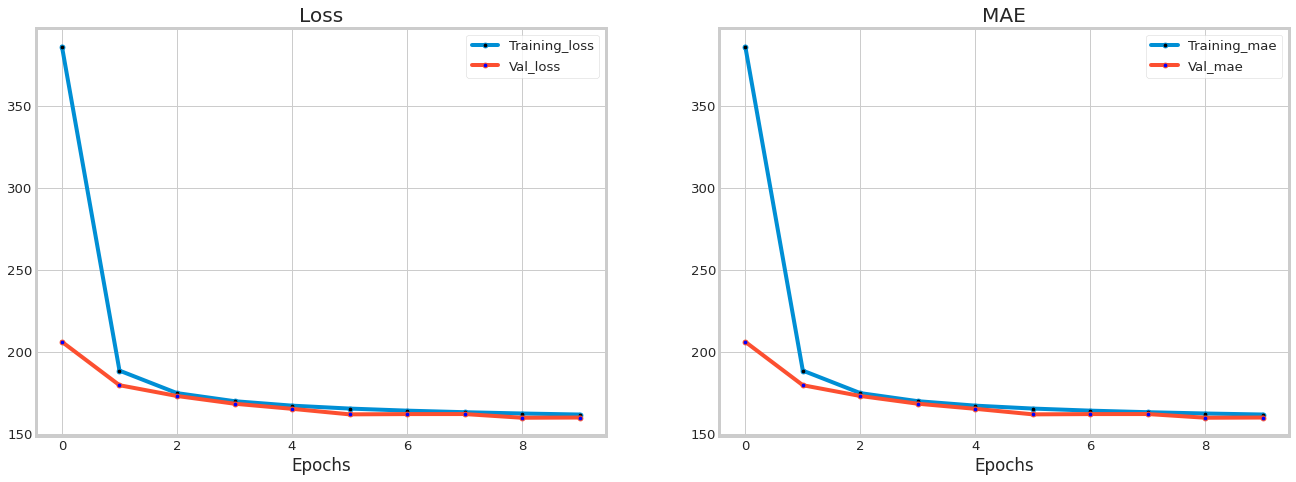

In [30]:
plot_loss_curves(small_model_history)

Let's make a medium model

In [31]:
# Set random seed
set_seed()

# Create the model
medium_model = tf.keras.Sequential([
    layers.Dense(200, activation="relu", input_shape=[20], name="input_1"),
    layers.Dense(200, activation="relu", name="input_2"),
    layers.Dense(10, activation="relu", name="input_3"),
    layers.Dense(1, activation="relu", name="output_layer")
], name="medium_model")

# Compile the model
medium_model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# Fit the model
medium_model_history = medium_model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=15
)

Epoch 1/15
36465/36465 [==============================] - 93s 3ms/step - loss: 198.5909 - mae: 198.5909 - val_loss: 165.2664 - val_mae: 165.2664
Epoch 2/15
36465/36465 [==============================] - 93s 3ms/step - loss: 175.2809 - mae: 175.2809 - val_loss: 191.2341 - val_mae: 191.2341
Epoch 3/15
36465/36465 [==============================] - 93s 3ms/step - loss: 171.5850 - mae: 171.5850 - val_loss: 171.9935 - val_mae: 171.9935
Epoch 4/15
36465/36465 [==============================] - 107s 3ms/step - loss: 170.3807 - mae: 170.3807 - val_loss: 174.6167 - val_mae: 174.6167
Epoch 5/15
36465/36465 [==============================] - 94s 3ms/step - loss: 168.7600 - mae: 168.7600 - val_loss: 167.2780 - val_mae: 167.2780
Epoch 6/15
36465/36465 [==============================] - 94s 3ms/step - loss: 167.1869 - mae: 167.1869 - val_loss: 167.5713 - val_mae: 167.5713
Epoch 7/15
36465/36465 [==============================] - 107s 3ms/step - loss: 165.6610 - mae: 165.6610 - val_loss: 167.9518 - v

great! look like our model is learning something! let's see its layer and architecture...

In [32]:
medium_model.summary() # see its layer

Model: "medium_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (Dense)              (None, 200)               4200      
_________________________________________________________________
input_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
input_3 (Dense)              (None, 10)                2010      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 46,421
Trainable params: 46,421
Non-trainable params: 0
_________________________________________________________________


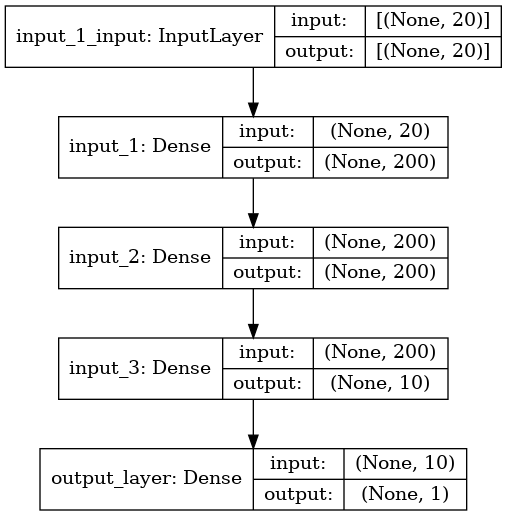

In [33]:
tf.keras.utils.plot_model(medium_model, show_shapes=True) # let's see its architecture

Let's evaluate it!

In [34]:
medium_model.evaluate(X_test, y_test) # evaluate it...

9117/9117 [==============================] - 14s 1ms/step - loss: 130.2422 - mae: 130.2422


[130.2421875, 130.2421875]

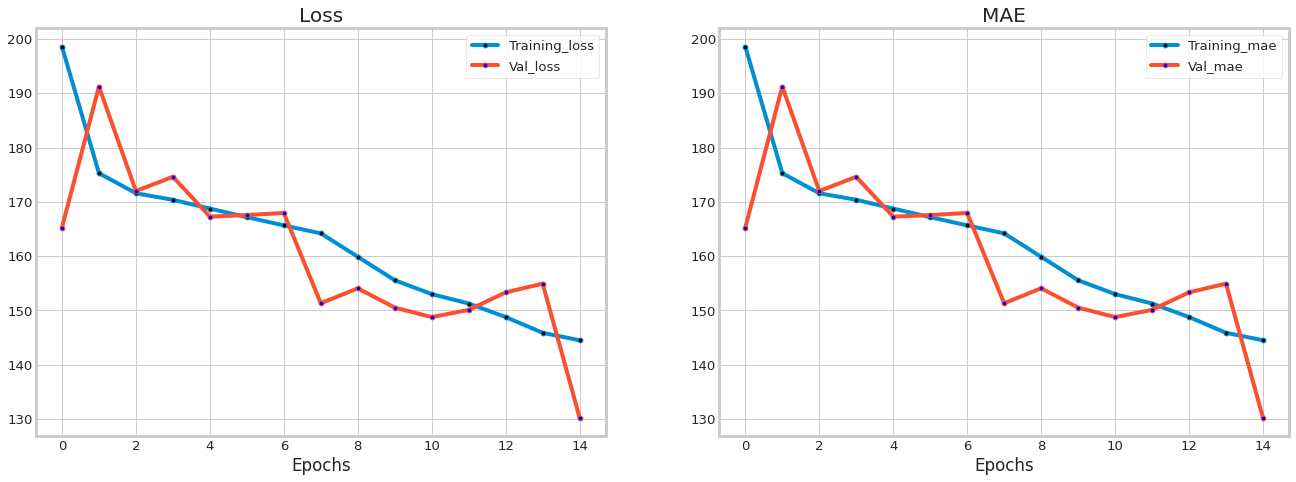

In [35]:
plot_loss_curves(medium_model_history)

Let's make a larger model!

In [36]:
# Set the seed
set_seed()

# Create the model
larger_model = tf.keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=[20], name="input_1"),
    layers.Dense(512, activation="relu", name="input_2"),
    layers.Dense(512, activation="relu", name="input_3"),
    layers.Dense(512, activation="relu", name="input_4"),
    layers.Dense(1, activation="relu", name="output_layer")
], name="larger_model")

# Compile the model
larger_model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# Fit the model
larger_model_history = larger_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20
) 

Epoch 1/20
36465/36465 [==============================] - 104s 3ms/step - loss: 187.3878 - mae: 187.3878 - val_loss: 165.1807 - val_mae: 165.1807
Epoch 2/20
36465/36465 [==============================] - 102s 3ms/step - loss: 169.6405 - mae: 169.6405 - val_loss: 169.6728 - val_mae: 169.6728
Epoch 3/20
36465/36465 [==============================] - 112s 3ms/step - loss: 164.1212 - mae: 164.1212 - val_loss: 154.0227 - val_mae: 154.0227
Epoch 4/20
36465/36465 [==============================] - 103s 3ms/step - loss: 163.1956 - mae: 163.1956 - val_loss: 152.4968 - val_mae: 152.4968
Epoch 5/20
36465/36465 [==============================] - 102s 3ms/step - loss: 161.4335 - mae: 161.4335 - val_loss: 151.5098 - val_mae: 151.5098
Epoch 6/20
36465/36465 [==============================] - 113s 3ms/step - loss: 159.8086 - mae: 159.8086 - val_loss: 157.0022 - val_mae: 157.0022
Epoch 7/20
36465/36465 [==============================] - 105s 3ms/step - loss: 159.0753 - mae: 159.0753 - val_loss: 149.800

Let's see its layer and architecture!

In [37]:
larger_model.summary() # see its layer

Model: "larger_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (Dense)              (None, 512)               10752     
_________________________________________________________________
input_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
input_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
input_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
output_layer (Dense)         (None, 1)                 513       
Total params: 799,233
Trainable params: 799,233
Non-trainable params: 0
_________________________________________________________________


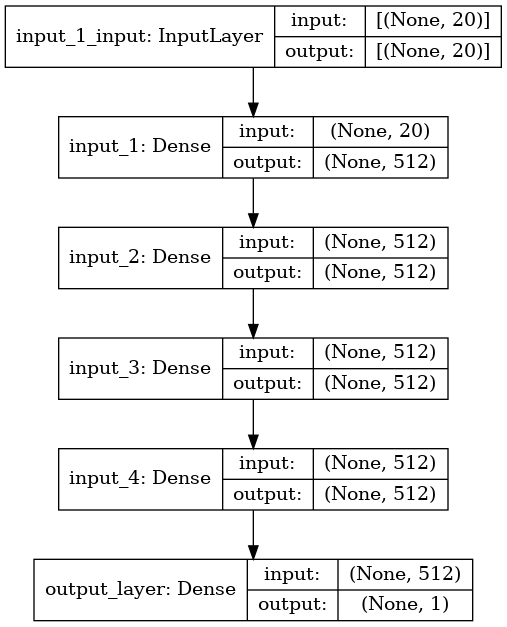

In [38]:
tf.keras.utils.plot_model(larger_model, show_shapes=True) # let's see its architecture

Let's evaluate it!

In [39]:
larger_model.evaluate(X_test, y_test) # evaluate it...

9117/9117 [==============================] - 14s 2ms/step - loss: 156.9274 - mae: 156.9274


[156.92738342285156, 156.92738342285156]

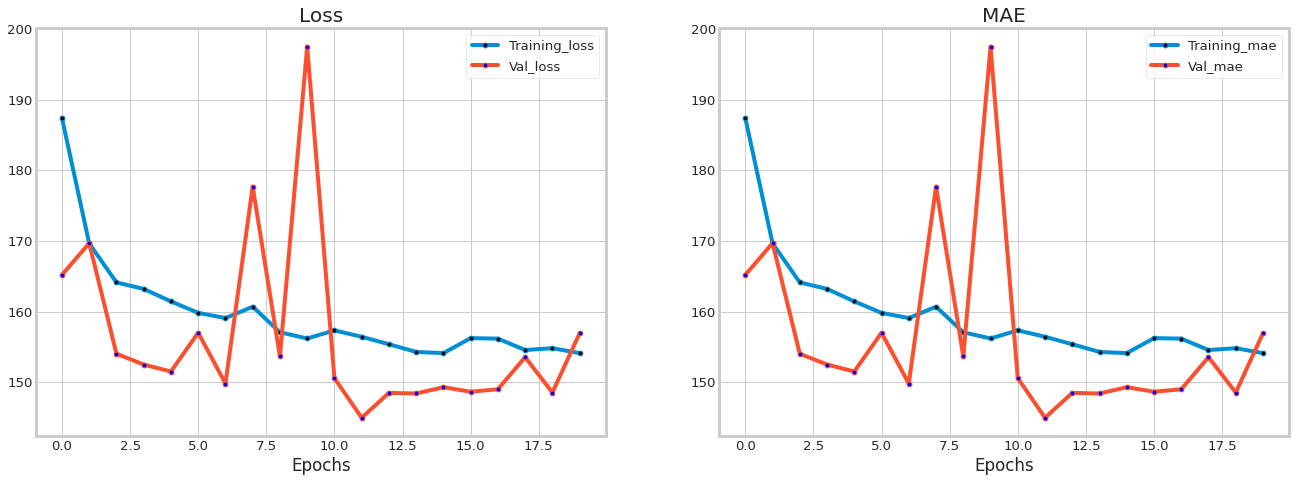

In [40]:
plot_loss_curves(larger_model_history)